In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('data_stocks.csv') # note:csv file exceed permissible size limit to upload to github .

In [7]:
data.isnull().sum()
data.isin([np.inf, -np.inf]).sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [4]:
# dtale.show(data)

In [8]:
data.columns
df = data.drop('DATE', axis = 1)

In [9]:
## clustering using Kmeans algorithm

## scale the data
scaler = StandardScaler()
df1 = pd.DataFrame( scaler.fit_transform(df), columns= df.columns)


from sklearn.cluster import KMeans

# GET WCSS VALUES
wcss = []
for i in range(1,26):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
wcss

[20674265.9999999,
 12858182.383248927,
 9125500.415560424,
 6960005.929551832,
 5523679.834193223,
 4700539.367215582,
 4014380.6729772096,
 3569799.045263592,
 3186045.212619147,
 2921356.7466510627,
 2642285.4015576076,
 2417144.057980133,
 2252926.775359716,
 2089125.1993342496,
 1980290.5692928089,
 1836676.2593677593,
 1713096.7692671195,
 1624508.4856008599,
 1517286.3917252687,
 1434459.477691541,
 1378536.8085854175,
 1331487.8904675138,
 1257463.2409543782,
 1212282.0469937027,
 1182411.1800355816]

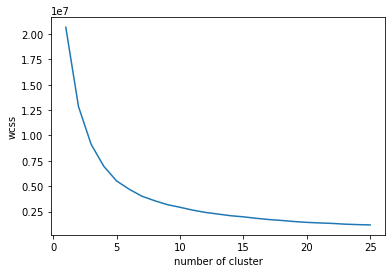

In [10]:
%matplotlib inline
plt.plot(range(1,26), wcss)
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()


##### from above elbow curve we can aproximately define the number of optimum clusters as 7

In [11]:
kms = KMeans(n_clusters=7, init='k-means++', random_state=33)
df_kmean = df1.copy()
df_kmean['cluster number'] = kms.fit_predict(df_kmean)


In [12]:
# print(df_kmean['cluster number'].unique())

# saparete each cluster of data
cluster_1 = df_kmean[df_kmean['cluster number'] == 0]
cluster_2 = df_kmean[df_kmean['cluster number'] == 1]
cluster_3 = df_kmean[df_kmean['cluster number'] == 2]
cluster_4 = df_kmean[df_kmean['cluster number'] == 3]
cluster_5 = df_kmean[df_kmean['cluster number'] == 4]
cluster_6 = df_kmean[df_kmean['cluster number'] == 5]
cluster_7 = df_kmean[df_kmean['cluster number'] == 6]

for i in range(1,8):
    print(f"cluster_{i} has { df_kmean[df_kmean['cluster number'] == i-1 ].shape[0]} records")


cluster_1 has 5380 records
cluster_2 has 7038 records
cluster_3 has 4318 records
cluster_4 has 5173 records
cluster_5 has 6858 records
cluster_6 has 6239 records
cluster_7 has 6260 records


##### sinse the dataset is not small and having higher feature diamention, k means in computaionally expensive and not an appropriate choice.

In [13]:
# using dbscan
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# data1 = df1.copy()
# dbs = DBSCAN(eps = 5, min_samples = 6)
# dbs.fit(data1)
# print(silhouette_score(data1, dbs.labels_))
# labels = pd.Series(dbs.labels_)

# data1['cluster'] = pd.dbs.labels_
# print(data1['cluster'].unique())
# data1


0.23461794892802107


AttributeError: module 'pandas' has no attribute 'dbs'

In [15]:
# parameter tuning of DBSCAN
data2 = df1.copy()
from sklearn.neighbors import NearestNeighbors

# finding out the distences, indices to 506 nearest points form each point
min_samples = 250
k = min_samples if  min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(data2)
distences, indices = nbrs.kneighbors(data2)

In [16]:
# remove the first distance 0, ie distance to the point itself and round values
distences_ = np.round(distences[:,1::], 4) 
distences_

min = np.min(distences_) # min distence between any 2 points in the dataset
max = np.max(distences_) # max distence between any 2 points in the dataset
print(min, max)


0.0615 7.6327


In [17]:
from sklearn.metrics import silhouette_score
# for tuning lets take an distance range of 0.5 to 5 with step of 0.5
# and min_samples range from 5 to 100 with an interval 5
# all_data = data2.copy()

# best_score = -1
# best_params = {}
# for eps in np.arange(0.5, 5.5, 0.5):
#     for min_samples in range(2, 67, 4):
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         dbscan.fit(all_data)
#         labels = pd.Series(dbscan.labels_)
#         if len(labels.unique()) != 1:
#             sh_score = silhouette_score(all_data, dbscan.labels_)
#             if sh_score > best_score:
#                 best_params = {
#                     'eps':eps,
#                     'min_samples':min_samples
#                 }
#                 best_score = sh_score

# print(best_score)
# print(best_params)

In [18]:
best_score = 0.5540486819209219
best_params = {'eps': 1.5, 'min_samples': 6}
all_data = pd.read_csv('data_stocks.csv').drop('DATE', axis=1)
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(all_data), columns=all_data.columns)
data

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-1.464426,-1.650134,-1.086073,-1.689824,1.296396,-0.282628,-1.893421,1.834067,-0.129860,-1.756952,...,-2.507925,1.347687,-1.501169,-1.845414,0.676495,-1.021763,-1.225651,-1.955784,0.102815,-2.041884
1,-1.452038,-1.640930,-1.082866,-1.590065,1.316393,-0.302970,-1.847626,1.850617,-0.133415,-1.748783,...,-2.507925,1.347687,-1.693422,-1.845414,0.676495,-1.020051,-1.225651,-1.985500,0.061795,-2.041884
2,-1.487941,-1.656271,-1.084454,-1.603800,1.291396,-0.286583,-1.862536,1.841308,-0.093421,-1.789624,...,-2.468197,1.368901,-1.706681,-1.787088,0.671063,-1.021763,-1.254010,-1.983023,0.049311,-2.037402
3,-1.446730,-1.637862,-1.092487,-1.625790,1.276398,-0.302970,-1.864964,1.805105,-0.136969,-1.818212,...,-2.491295,1.368901,-1.600610,-1.781256,0.671063,-1.022618,-1.242667,-1.950831,0.049311,-2.032921
4,-1.433078,-1.586379,-1.089280,-1.653679,1.293896,-0.321053,-1.842291,1.805105,-0.122750,-1.781456,...,-2.489447,1.401899,-1.693422,-1.798753,0.676495,-1.021763,-1.231323,-1.943402,0.048419,-2.074751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1.281254,-0.916857,2.189672,1.991146,2.111290,0.697213,1.223833,-0.774607,1.728053,0.750652,...,0.320191,-0.491268,1.869896,-1.218413,-2.403409,1.111060,2.146175,1.268407,-1.268684,0.759260
41262,1.269878,-0.913789,2.191275,2.001266,2.101292,0.702863,1.227028,-0.774607,1.730275,0.750652,...,0.330354,-0.481840,1.866581,-1.215497,-2.397977,1.111916,2.143340,1.273359,-1.265117,0.754778
41263,1.225890,-0.910720,2.173638,1.987531,2.086294,0.687041,1.221703,-0.774607,1.719610,0.752694,...,0.331278,-0.480897,1.876525,-1.227162,-2.427852,1.111488,2.140504,1.268407,-1.268684,0.747308
41264,1.262799,-0.919925,2.152793,1.972351,2.066296,0.659918,1.206793,-0.777710,1.705390,0.724106,...,0.324811,-0.481840,1.869896,-1.235911,-2.436000,1.110204,2.136250,1.256025,-1.282952,0.730905


In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

                
DBS = DBSCAN(**best_params)
DBS.fit(data)
print(silhouette_score(data, DBS.labels_))

0.55393896007901


In [20]:
data['cluster'] = DBS.labels_ 
num_clusters = data['cluster'].nunique()
clusters = data['cluster'].unique()
print(num_clusters)
print(clusters)

107
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]


In [21]:
noice_data = data[data['cluster'] == -1]
noice_data

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,cluster
0,-1.464426,-1.650134,-1.086073,-1.689824,1.296396,-0.282628,-1.893421,1.834067,-0.129860,-1.756952,...,1.347687,-1.501169,-1.845414,0.676495,-1.021763,-1.225651,-1.955784,0.102815,-2.041884,-1
1,-1.452038,-1.640930,-1.082866,-1.590065,1.316393,-0.302970,-1.847626,1.850617,-0.133415,-1.748783,...,1.347687,-1.693422,-1.845414,0.676495,-1.020051,-1.225651,-1.985500,0.061795,-2.041884,-1
391,-1.704588,-1.723769,-1.151812,-1.778017,0.746467,-0.486055,-1.899811,1.509276,-0.322716,-1.871305,...,1.260477,-1.547575,-2.131209,0.714519,-1.033742,-1.217144,-2.052361,0.038610,-2.094172,-1
392,-1.668187,-1.711497,-1.150802,-1.676812,0.883949,-0.458931,-1.927501,1.550651,-0.236508,-1.826380,...,1.237850,-1.487910,-2.116628,0.712509,-1.036737,-1.205801,-2.056075,0.038610,-2.143472,-1
393,-1.671476,-1.751996,-1.110124,-1.649400,0.886449,-0.474753,-1.835911,1.595128,-0.236508,-1.793708,...,1.259534,-1.511113,-2.148707,0.595016,-1.034598,-1.191621,-2.030074,0.038610,-2.113623,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40094,0.195722,-1.008900,1.577173,1.346325,-0.443379,0.092582,0.706243,-1.260760,1.277906,-0.113123,...,-0.603463,1.966022,-0.912204,-2.479456,1.089240,1.757664,1.014582,-1.643216,0.399219,-1
40484,0.619671,-0.903050,2.138363,1.551627,1.401382,0.406764,0.884098,-1.070436,1.330342,0.291197,...,-0.600634,1.886469,-0.737227,-2.365385,1.106354,1.845575,1.062871,-1.536207,0.393244,-1
40485,0.618660,-0.969015,2.101485,1.528494,1.176411,0.274039,0.830848,-1.051818,1.330342,0.360626,...,-0.638347,1.946134,-0.713897,-2.463160,1.106354,1.831396,1.057918,-1.536207,0.393244,-1
40875,1.063594,-0.969015,2.119122,1.885603,2.451247,0.680260,1.132243,-0.859425,1.407662,0.869090,...,-0.594977,1.840063,-1.014274,-2.436000,1.116622,2.072443,1.075252,-1.411363,0.518735,-1


In [22]:
for i in range(0,106):
    print(f"cluster {i} has {data[data['cluster'] == i].shape[0]} records")

cluster 0 has 389 records
cluster 1 has 386 records
cluster 2 has 390 records
cluster 3 has 389 records
cluster 4 has 391 records
cluster 5 has 390 records
cluster 6 has 388 records
cluster 7 has 390 records
cluster 8 has 390 records
cluster 9 has 390 records
cluster 10 has 388 records
cluster 11 has 389 records
cluster 12 has 388 records
cluster 13 has 389 records
cluster 14 has 387 records
cluster 15 has 386 records
cluster 16 has 385 records
cluster 17 has 384 records
cluster 18 has 386 records
cluster 19 has 390 records
cluster 20 has 385 records
cluster 21 has 387 records
cluster 22 has 387 records
cluster 23 has 389 records
cluster 24 has 390 records
cluster 25 has 389 records
cluster 26 has 389 records
cluster 27 has 389 records
cluster 28 has 389 records
cluster 29 has 390 records
cluster 30 has 390 records
cluster 31 has 386 records
cluster 32 has 384 records
cluster 33 has 388 records
cluster 34 has 390 records
cluster 35 has 390 records
cluster 36 has 390 records
cluster 37 

##### FOR THE BEST silhoutte score(0.55) the optimum number of clusters will be 105 with each having approx 390 records and some noice data of 298 records. 


In [23]:
# DBS = DBSCAN(eps = 5, min_samples=6)
# DBS.fit(data)
# print(silhouette_score(data, DBS.labels_))
# data['cluster'] = DBS.labels_
# num_clusters = data['cluster'].nunique()
# noice_data = data[data['cluster'] == -1]
# print(noice_data.shape)
# for i in range(0,num_clusters):
#     print(f"cluster{i+1} has {data[data['cluster'] == i].shape[1]} records")

data

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,cluster
0,-1.464426,-1.650134,-1.086073,-1.689824,1.296396,-0.282628,-1.893421,1.834067,-0.129860,-1.756952,...,1.347687,-1.501169,-1.845414,0.676495,-1.021763,-1.225651,-1.955784,0.102815,-2.041884,-1
1,-1.452038,-1.640930,-1.082866,-1.590065,1.316393,-0.302970,-1.847626,1.850617,-0.133415,-1.748783,...,1.347687,-1.693422,-1.845414,0.676495,-1.020051,-1.225651,-1.985500,0.061795,-2.041884,-1
2,-1.487941,-1.656271,-1.084454,-1.603800,1.291396,-0.286583,-1.862536,1.841308,-0.093421,-1.789624,...,1.368901,-1.706681,-1.787088,0.671063,-1.021763,-1.254010,-1.983023,0.049311,-2.037402,0
3,-1.446730,-1.637862,-1.092487,-1.625790,1.276398,-0.302970,-1.864964,1.805105,-0.136969,-1.818212,...,1.368901,-1.600610,-1.781256,0.671063,-1.022618,-1.242667,-1.950831,0.049311,-2.032921,0
4,-1.433078,-1.586379,-1.089280,-1.653679,1.293896,-0.321053,-1.842291,1.805105,-0.122750,-1.781456,...,1.401899,-1.693422,-1.798753,0.676495,-1.021763,-1.231323,-1.943402,0.048419,-2.074751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1.281254,-0.916857,2.189672,1.991146,2.111290,0.697213,1.223833,-0.774607,1.728053,0.750652,...,-0.491268,1.869896,-1.218413,-2.403409,1.111060,2.146175,1.268407,-1.268684,0.759260,105
41262,1.269878,-0.913789,2.191275,2.001266,2.101292,0.702863,1.227028,-0.774607,1.730275,0.750652,...,-0.481840,1.866581,-1.215497,-2.397977,1.111916,2.143340,1.273359,-1.265117,0.754778,105
41263,1.225890,-0.910720,2.173638,1.987531,2.086294,0.687041,1.221703,-0.774607,1.719610,0.752694,...,-0.480897,1.876525,-1.227162,-2.427852,1.111488,2.140504,1.268407,-1.268684,0.747308,105
41264,1.262799,-0.919925,2.152793,1.972351,2.066296,0.659918,1.206793,-0.777710,1.705390,0.724106,...,-0.481840,1.869896,-1.235911,-2.436000,1.110204,2.136250,1.256025,-1.282952,0.730905,105


#### problem 1 )There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance ?
##### each cluster with records with a perticular cluster number (within 0 to 105) labelled in the data have similar performance alltogether.

#### problem 2) How many Unique patterns that exist in the historical stock data set, based on fluctuations in price. ?
##### ans) 107 unique patterns including one of them being noice data (labelled as -1 in cluster number columns)

#### problem 3) Identify which all stocks are moving together and which all stocks are different from each other.
##### ans) each of the records in each clusters are moving together and individual clusters are different from each other
